In [165]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
%matplotlib inline

In [221]:
import rich
from eng_module import utils as ut
import rc_section_capacity_module as rcscm
# from rc_section_capacity_module import concrete_section_analysis

import pandas as pd

from matplotlib.figure import Figure

import plotly.express as px

from sectionproperties.pre.library import rectangular_section
import concreteproperties.stress_strain_profile as ssp

from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_circular_array,
    add_bar_rectangular_array,
)
from plotly import graph_objects as go



from eng_module import utils as ut

from rich import print

import numpy as np

import hashlib as hl

In [168]:
    conc_class = "B30"
    conc_Rb = 17
    conc_Rbt = 1.15
    conc_eb1 = 0.0005230769230769
    conc_eb2_short = 0.0035

    rebar_class = "A500"
    rebar_Rs = 435
    rebar_es2 = 0.025

    concrete_material = Concrete(
        name=conc_class,
        density=2.4e-6,
        stress_strain_profile=ssp.ConcreteLinear(elastic_modulus=34.8e3),
        ultimate_stress_strain_profile=ssp.BilinearStressStrain(
            compressive_strength=conc_Rb,
            compressive_strain=conc_eb1,
            ultimate_strain=conc_eb2_short,
        ),
        flexural_tensile_strength=conc_Rbt,
        colour="lightgrey",
    )

    rebar_material = SteelBar(
        name=rebar_class,
        density=7.85e-6,
        stress_strain_profile=ssp.SteelElasticPlastic(
            yield_strength=rebar_Rs,
            elastic_modulus=200e3,
            fracture_strain=rebar_es2,
        ),
        colour="grey",
    )

In [169]:
    h =  500
    b =  100
    c_mat =  concrete_material
    nrr_top =  0
    nrc_top =  1
    dr_top =  20
    src_top =  70
    cc_top =  35
    nrr_bot =  1
    nrc_bot =  1
    dr_bot =  20
    src_bot =  70
    cc_bot =  50
    r_mat =  rebar_material
    nrc_side = 0
    nrr_side = 0
    dr_side = 0
    src_side = 0
    srr_side = 0
    cc_side = 10

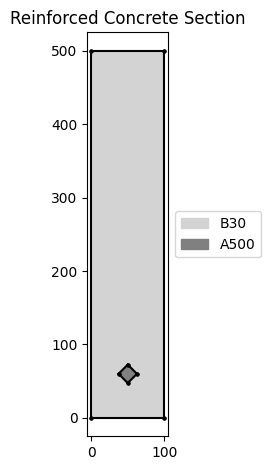

AttributeError: 'Figure' object has no attribute 'patch'

In [224]:
sec, fig = rcscm.create_rectangular_section(h,
    b,
    c_mat,
    nrr_top,
    nrc_top,
    dr_top,
    src_top,
    cc_top,
    nrr_bot,
    nrc_bot,
    dr_bot,
    src_bot,
    cc_bot,
    r_mat,
    nrc_side,
    nrr_side,
    dr_side,
    src_side,
    srr_side,
    cc_side)

fig.patch.set_alpha(0)

In [222]:
hl.sha256(

TypeError: object supporting the buffer API required

In [172]:
sag_res = sec.ultimate_bending_capacity()

In [173]:
res = sag_res.m_x

In [174]:
res

54625413.03703122

In [175]:
patches = fig.patches
lines = fig.lines 
images = fig.images
collections = fig.collections
artists = fig.artists
containers = fig.containers

AttributeError: 'Figure' object has no attribute 'patches'

In [ ]:
print("Patches:", patches)
print("Lines:", lines)
print("Images:", images)
print("Collections:", collections)
print("Artists:", artists)
print("Containers:", containers)

In [ ]:
fig_plotly = go.Figure()

for polygon in patches:
    vertices = polygon.get_path().vertices
    x_coords, y_coords = vertices[:, 0], vertices[:, 1]
    print (x_coords, y_coords)
    fig_plotly.add_scatter(
        x=x_coords,
        y=y_coords,
        fill='toself',
        fillcolor="rgba(255,0,0,1)",
        line=dict(color="rgba(0,0,0,0)", width=2),
    )

shapes = []
for col in fig.collections:
    paths_list = [path.get_paths() for path in fig.collections]
    # print(paths)
    for paths in paths_list:
        for p in paths:
            vertices = p.vertices
            x_coords = vertices[:, 0].tolist() + [vertices[0, 0]]  # Closing the loop
            y_coords = vertices[:, 1].tolist() + [vertices[0, 1]]  # Closing the loop
            shapes.append(go.layout.Shape(
                type="path",
                path=f"M {' L '.join([f'{x},{y}' for x, y in zip(x_coords, y_coords)])} Z",
                fillcolor="rgba(0,0,255,1)",
                line=dict(color="rgba(255,0,0,0)"),  # No edge line
            ))
            
for shape in shapes:
    fig_plotly.add_shape(shape)

fig_plotly.layout.xaxis.scaleanchor = 'y'
fig_plotly.layout.xaxis.scaleratio = 1

fig_plotly.show()


In [ ]:
rcscm.define_concrete_material(no_tension=True)

In [ ]:
np.arccos(0)

In [ ]:
np.arccos(1)

In [ ]:
np.cos(0)

In [ ]:
m_x = [1, -1, -1, 1]
m_y = [-1, -1, 1, 1]

In [ ]:
(np.arctan2(m_x, m_y) - np.pi /2)/np.pi

In [ ]:
theta_list = range(,)

In [ ]:
np.arctan(1)/np.pi

In [ ]:
sec

In [ ]:
val.append(1 for l in list)

In [ ]:
val

In [194]:
n=3

In [195]:
alfa = np.linspace(0, 2 * np.pi, 8, endpoint=True)
circ_x = np.cos(alfa)
circ_y = np.sin(alfa)
z_list = np.linspace(-5, 5, n, endpoint=False)
scale_list = np.linspace(-5, 5, n, endpoint=False)

In [196]:
traces = []
for z in z_list:
    x = circ_x*np.cos(z)
    y = circ_y*np.cos(z)
    z = [z] * len(x)
    plot.add_scatter3d(x=x, y=y, z=z, mode='lines')
    plot.add_mesh3d()
    traces.append(list(zip(x,y,z)))

In [197]:
trace_pairs_vertices = []
for i in range(len(traces)-1):
    trace_pairs_vertices.append(traces[i] + traces[i+1])

In [198]:
faces = []
num_vertices_per_trace = len(traces[0])
for i in range(num_vertices_per_trace - 1):
    faces.append([i, i + 1, i + num_vertices_per_trace])
    faces.append([i + num_vertices_per_trace, i + 1 + num_vertices_per_trace, i + 1])

In [203]:
plot = go.Figure()
for trace_pair_vertices in trace_pairs_vertices:
    # print(trace_pair_vertices)
    plot.add_mesh3d(x=[v[0] for v in trace_pair_vertices],
                     y=[v[1] for v in trace_pair_vertices],
                     z=[v[2] for v in trace_pair_vertices],
                     i=[f[0] for f in faces],
                     j=[f[1] for f in faces],
                     k=[f[2] for f in faces],
                     color='lightblue',  # Color of the face
                     opacity=1)        # Opacity of the face

In [204]:
plot.show()

In [205]:
all_vertices = [item for sublist in traces for item in sublist]
mesh = go.Mesh3d(x=[v[0] for v in all_vertices],
                 y=[v[1] for v in all_vertices],
                 z=[v[2] for v in all_vertices],
                 i=[f[0] for f in faces],
                 j=[f[1] for f in faces],
                 k=[f[2] for f in faces],
                 color='lightblue',  # Color of the face
                 opacity=0.7)        # Opacity of the face

In [206]:
plot = go.Figure()

for z in z_list:
    x = circ_x*np.cos(z)
    y = circ_y*np.cos(z)
    z = [z] * len(x)
    plot.add_scatter3d(x=x, y=y, z=z, mode='lines')